# Finding Heavy Traffic Indicators on I-94

The goal of this project is to explore traffic patterns on i-94 utilizing data visualization including line plots, scatter plots and frequency histograms to determine particular indicators which cause heavy traffic.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
i_94 = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

#importing modules and dataset

### Exploring the Dataset

In [2]:
i_94.info()

#exploring datatypes, column names and null/non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [3]:
i_94.head()

#examining the first 5 rows of the datset

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
i_94.tail()

#examining the last 5 rows of the dataset

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


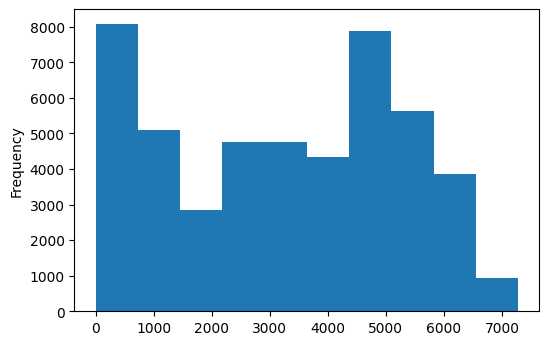

In [5]:
i_94["traffic_volume"].plot.hist()

#plotting a histogram of the traffic volume to examine the distribution

In [6]:
i_94["traffic_volume"].describe()

#descriptive statistics of the traffic volume column

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Based on the histogram and descriptive statistics above it appears to be a wide distribution with two the to largest groups being between 0 and 500 and 4,500 to 5,000. These could likely be attributed to daytime vs nighttime and rush hour

### Analzying Traffic Day vs Night

In [7]:
i_94["date_time"] = pd.to_datetime(i_94["date_time"])

#updating the date column to a datetime class

In [8]:
i_94["date_time"].dt.hour.value_counts().sort_index()

#examining the hours captured in the data and counts

0     2037
1     2049
2     2019
3     2025
4     2091
5     2063
6     2087
7     2079
8     2080
9     2018
10    2078
11    1952
12    1955
13    1905
14    1969
15    1934
16    1988
17    1933
18    1986
19    1961
20    1979
21    1982
22    1994
23    2040
Name: date_time, dtype: int64

In [9]:
day = i_94.copy()[(i_94["date_time"].dt.hour >= 7) & (i_94["date_time"].dt.hour <= 19)]

#extracting data associated with the daytimme

In [10]:
day["date_time"].dt.hour.unique()

#confirming hours pulled are correct for the day dataset

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  8,  7])

In [11]:
night = i_94.copy()[(i_94["date_time"].dt.hour < 7) | (i_94["date_time"].dt.hour > 19)]

#extracting data associated with nighttime 

In [12]:
night["date_time"].dt.hour.unique()

#confirming hours pulled are corret for the night datset

array([20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6])

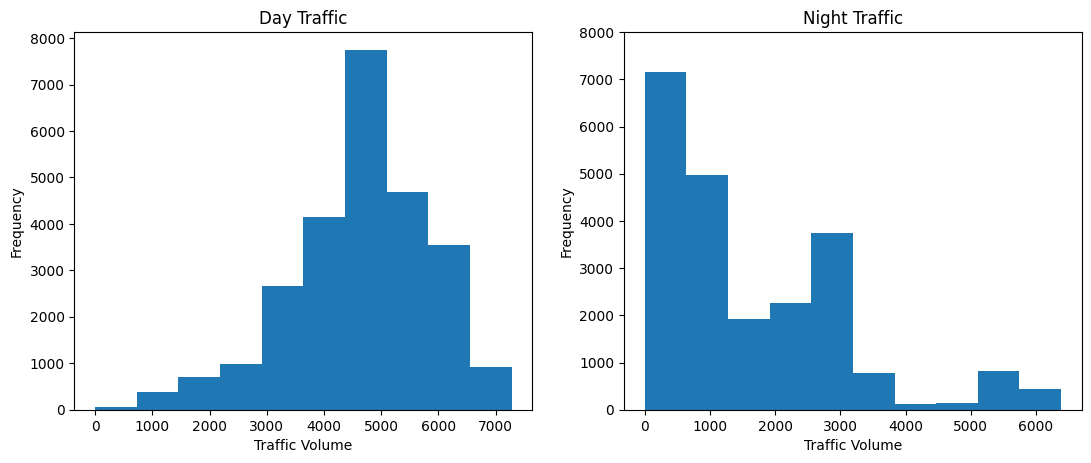

In [13]:
plt.figure(figsize=(13,5))
plt.subplot(1, 2, 1)
plt.title("Day Traffic")
plt.hist(day["traffic_volume"])
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.subplot(1, 2, 2)
plt.title("Night Traffic")
plt.hist(night["traffic_volume"])
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.ylim(0, 8000)
plt.show()

#frequency plot grid chart to compare day time vs night time traffic volume

In [14]:
day["traffic_volume"].describe()

#descriptive stats of daytimme traffic

count    25838.000000
mean      4649.292360
std       1202.321987
min          0.000000
25%       4021.000000
50%       4736.000000
75%       5458.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [15]:
night["traffic_volume"].describe()

#descriptive stats of night traffic

count    22366.000000
mean      1654.648484
std       1425.175292
min          0.000000
25%        486.000000
50%       1056.500000
75%       2630.750000
max       6386.000000
Name: traffic_volume, dtype: float64

Based on the analysis above, the night traffic volume mean is 1,654 whereas the day is 4,649.  The standard deviations are within 200 which is fairly close.  Daytimme most common values cluster around 4,500 - 5,000 and appear to be normally distributed.  Night time values appear to be skewed right with the majority of data centering around towards 0.

### Analzying Traffic Patterns by Month

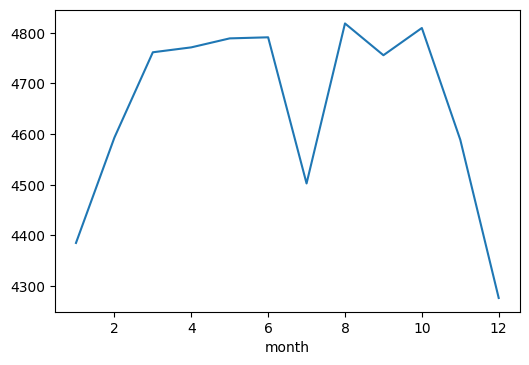

In [16]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()

by_month["traffic_volume"].plot.line()
plt.show()

#groups data by month, calculates averages and plots on a line graph

Per the plot above, it appears travel slows down fairly significantly in the winter time (December through March.  There is an interesting exception in July with a sharp decrease.

### Analzying Traffic by Weekday

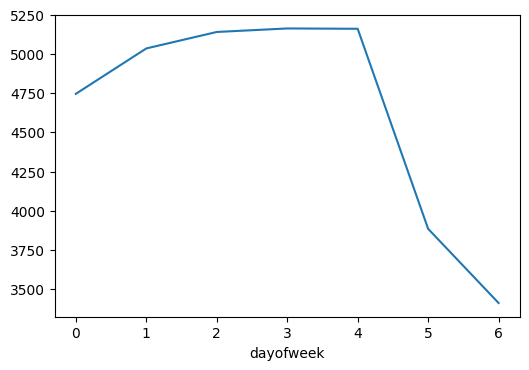

In [18]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()

by_dayofweek["traffic_volume"].plot.line()
plt.show()

#groups data by day of the week, calculates averages and plots on a line graph

Per the line graph above, traffic becomes slightly heavier as the typical work week progresses (Monday through Friday) and then falls sharply on Saturday and Sunday.

### Analzying Traffic by Hour

In [22]:
day['hour'] = day['date_time'].dt.hour
business_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

#splitting datasets weekdays vs weekends

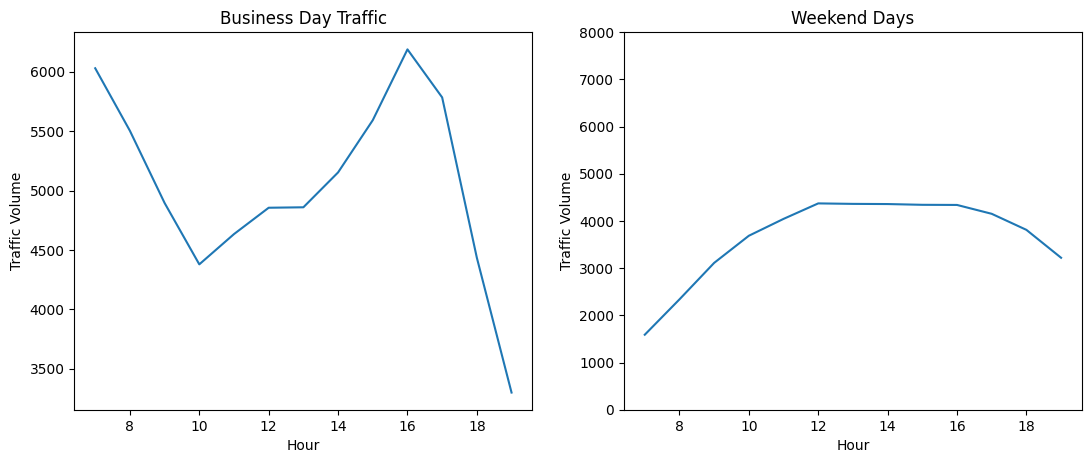

In [25]:
plt.figure(figsize=(13,5))
plt.subplot(1, 2, 1)
plt.title("Business Day Traffic")
by_hour_business["traffic_volume"].plot.line()
plt.xlabel("Hour")
plt.ylabel("Traffic Volume")
plt.subplot(1, 2, 2)
plt.title("Weekend Days")
by_hour_weekend["traffic_volume"].plot.line()
plt.xlabel("Hour")
plt.ylabel("Traffic Volume")
plt.ylim(0, 8000)
plt.show()

Traffic volume by hour clearly shows increases around rush hour (0700-0800 and 1500-1600) for weed days.  Weekends seem to peak in early afternoon hours and die down outside these hours at a somewhat parabolic rate.

### Analzying Weather Correlations

In [27]:
day.corr()['traffic_volume']

#calculates all correlation coefficients between traffic volume and the other columns
#this only applies to numeric columns

temp              0.118084
rain_1h           0.004020
snow_1h           0.003768
clouds_all       -0.033410
traffic_volume    1.000000
month            -0.017397
dayofweek        -0.371023
hour             -0.007369
Name: traffic_volume, dtype: float64

(225.0, 320.0)

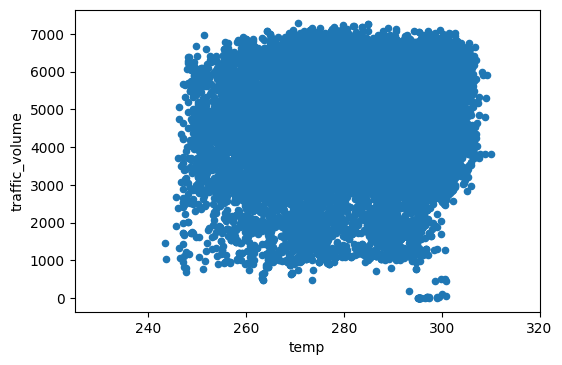

In [31]:
day.plot.scatter("temp", "traffic_volume")
plt.xlim(225,320)

#plots temp vs traffic volume which has the highest correlation coeff besides day of the week

Temperature is a very weak correlation to traffic volume although it is the highest at 11% besides day of the week

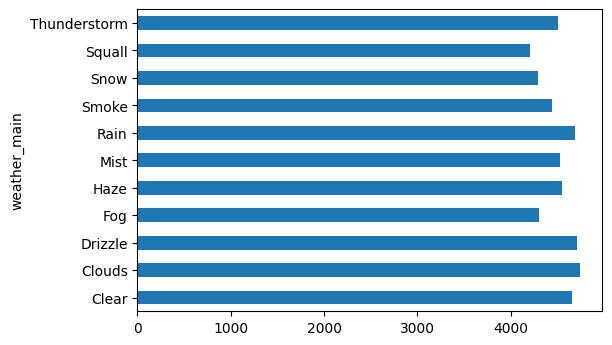

In [41]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_main["traffic_volume"].plot.barh()

#plots main weather characteristics and traffic volume averages

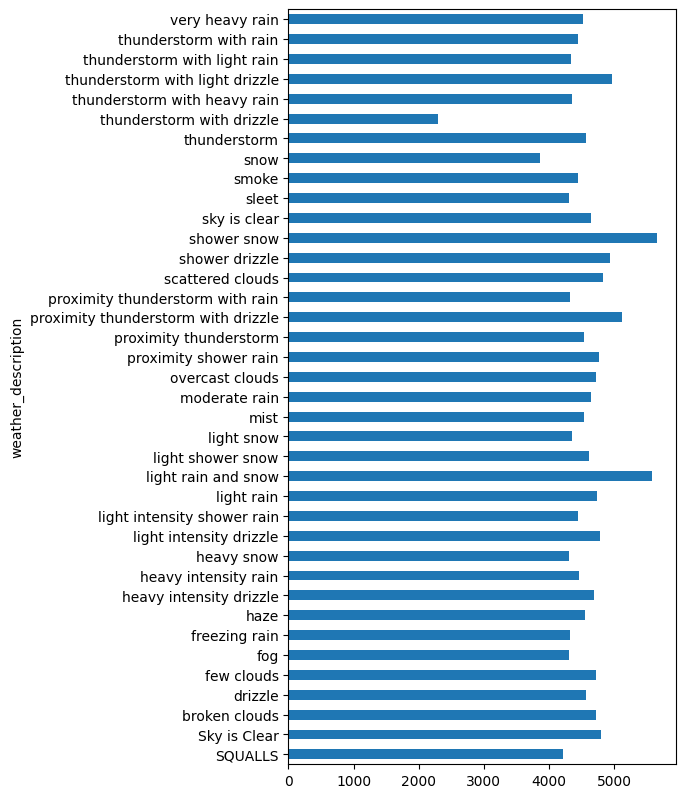

In [50]:
by_weather_description = day.groupby('weather_description').mean()
by_weather_description["traffic_volume"].plot.barh(figsize=(5,10))

#plots more detailed weather characteristics and traffice volume averages

Looks like there are no major differences in the broader weather classifications.  The more pinpointed weather classifications have shower snow and light rain and snow as the highest volumes which seems odd.  Thunderstorm with drizzle is by far the lowest.

# Conclusions

In this project we researched correlated variables in relation to traffic volume on I-94.  Based on our analysis we can draw the following conclusions:

- Traffic is heavier on weekdays vs weekends
- Traffic is heavier during rush our on weekdays
- Traffic is lighter in the winter months vs the rest of the year
- Snow showers, light rain and snow have higher traffic volumes and thunderstorms and drizzle have low traffic volumes
- Day traffic is normally distributed in relation to time while night traffic is skewed right